In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## to ignore warning
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel("Walmart Sales.xlsx")
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,1/5/2019,13:08:00,Ewallet,9.1
1,226-31-3081,A,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3/8/2019,10:29:00,Cash,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,3/3/2019,13:23:00,Credit card,7.4
3,123-19-1176,B,Yangon,Member,Male,Health and beauty,58.22,8,1/27/2019,20:33:00,Ewallet,8.4
4,373-73-7910,C,Yangon,Normal,Male,Sports and travel,86.31,7,2/8/2019,10:37:00,Ewallet,5.3


In [3]:
data = df.copy()
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,1/5/2019,13:08:00,Ewallet,9.1
1,226-31-3081,A,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3/8/2019,10:29:00,Cash,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,3/3/2019,13:23:00,Credit card,7.4
3,123-19-1176,B,Yangon,Member,Male,Health and beauty,58.22,8,1/27/2019,20:33:00,Ewallet,8.4
4,373-73-7910,C,Yangon,Normal,Male,Sports and travel,86.31,7,2/8/2019,10:37:00,Ewallet,5.3


In [4]:
if data.isnull().any().any():
    print("data contains missing values")
else:
    print("data does not contain missing values")

data does not contain missing values


In [5]:
print(data['Branch'].value_counts())
print(data['City'].value_counts())
print(data['Gender'].value_counts())
print(data['Payment'].value_counts())

Branch
A    343
B    340
C    317
Name: count, dtype: int64
City
Yangon       340
Mandalay     332
Naypyitaw    328
Name: count, dtype: int64
Gender
Female    501
Male      499
Name: count, dtype: int64
Payment
Ewallet        345
Cash           344
Credit card    311
Name: count, dtype: int64


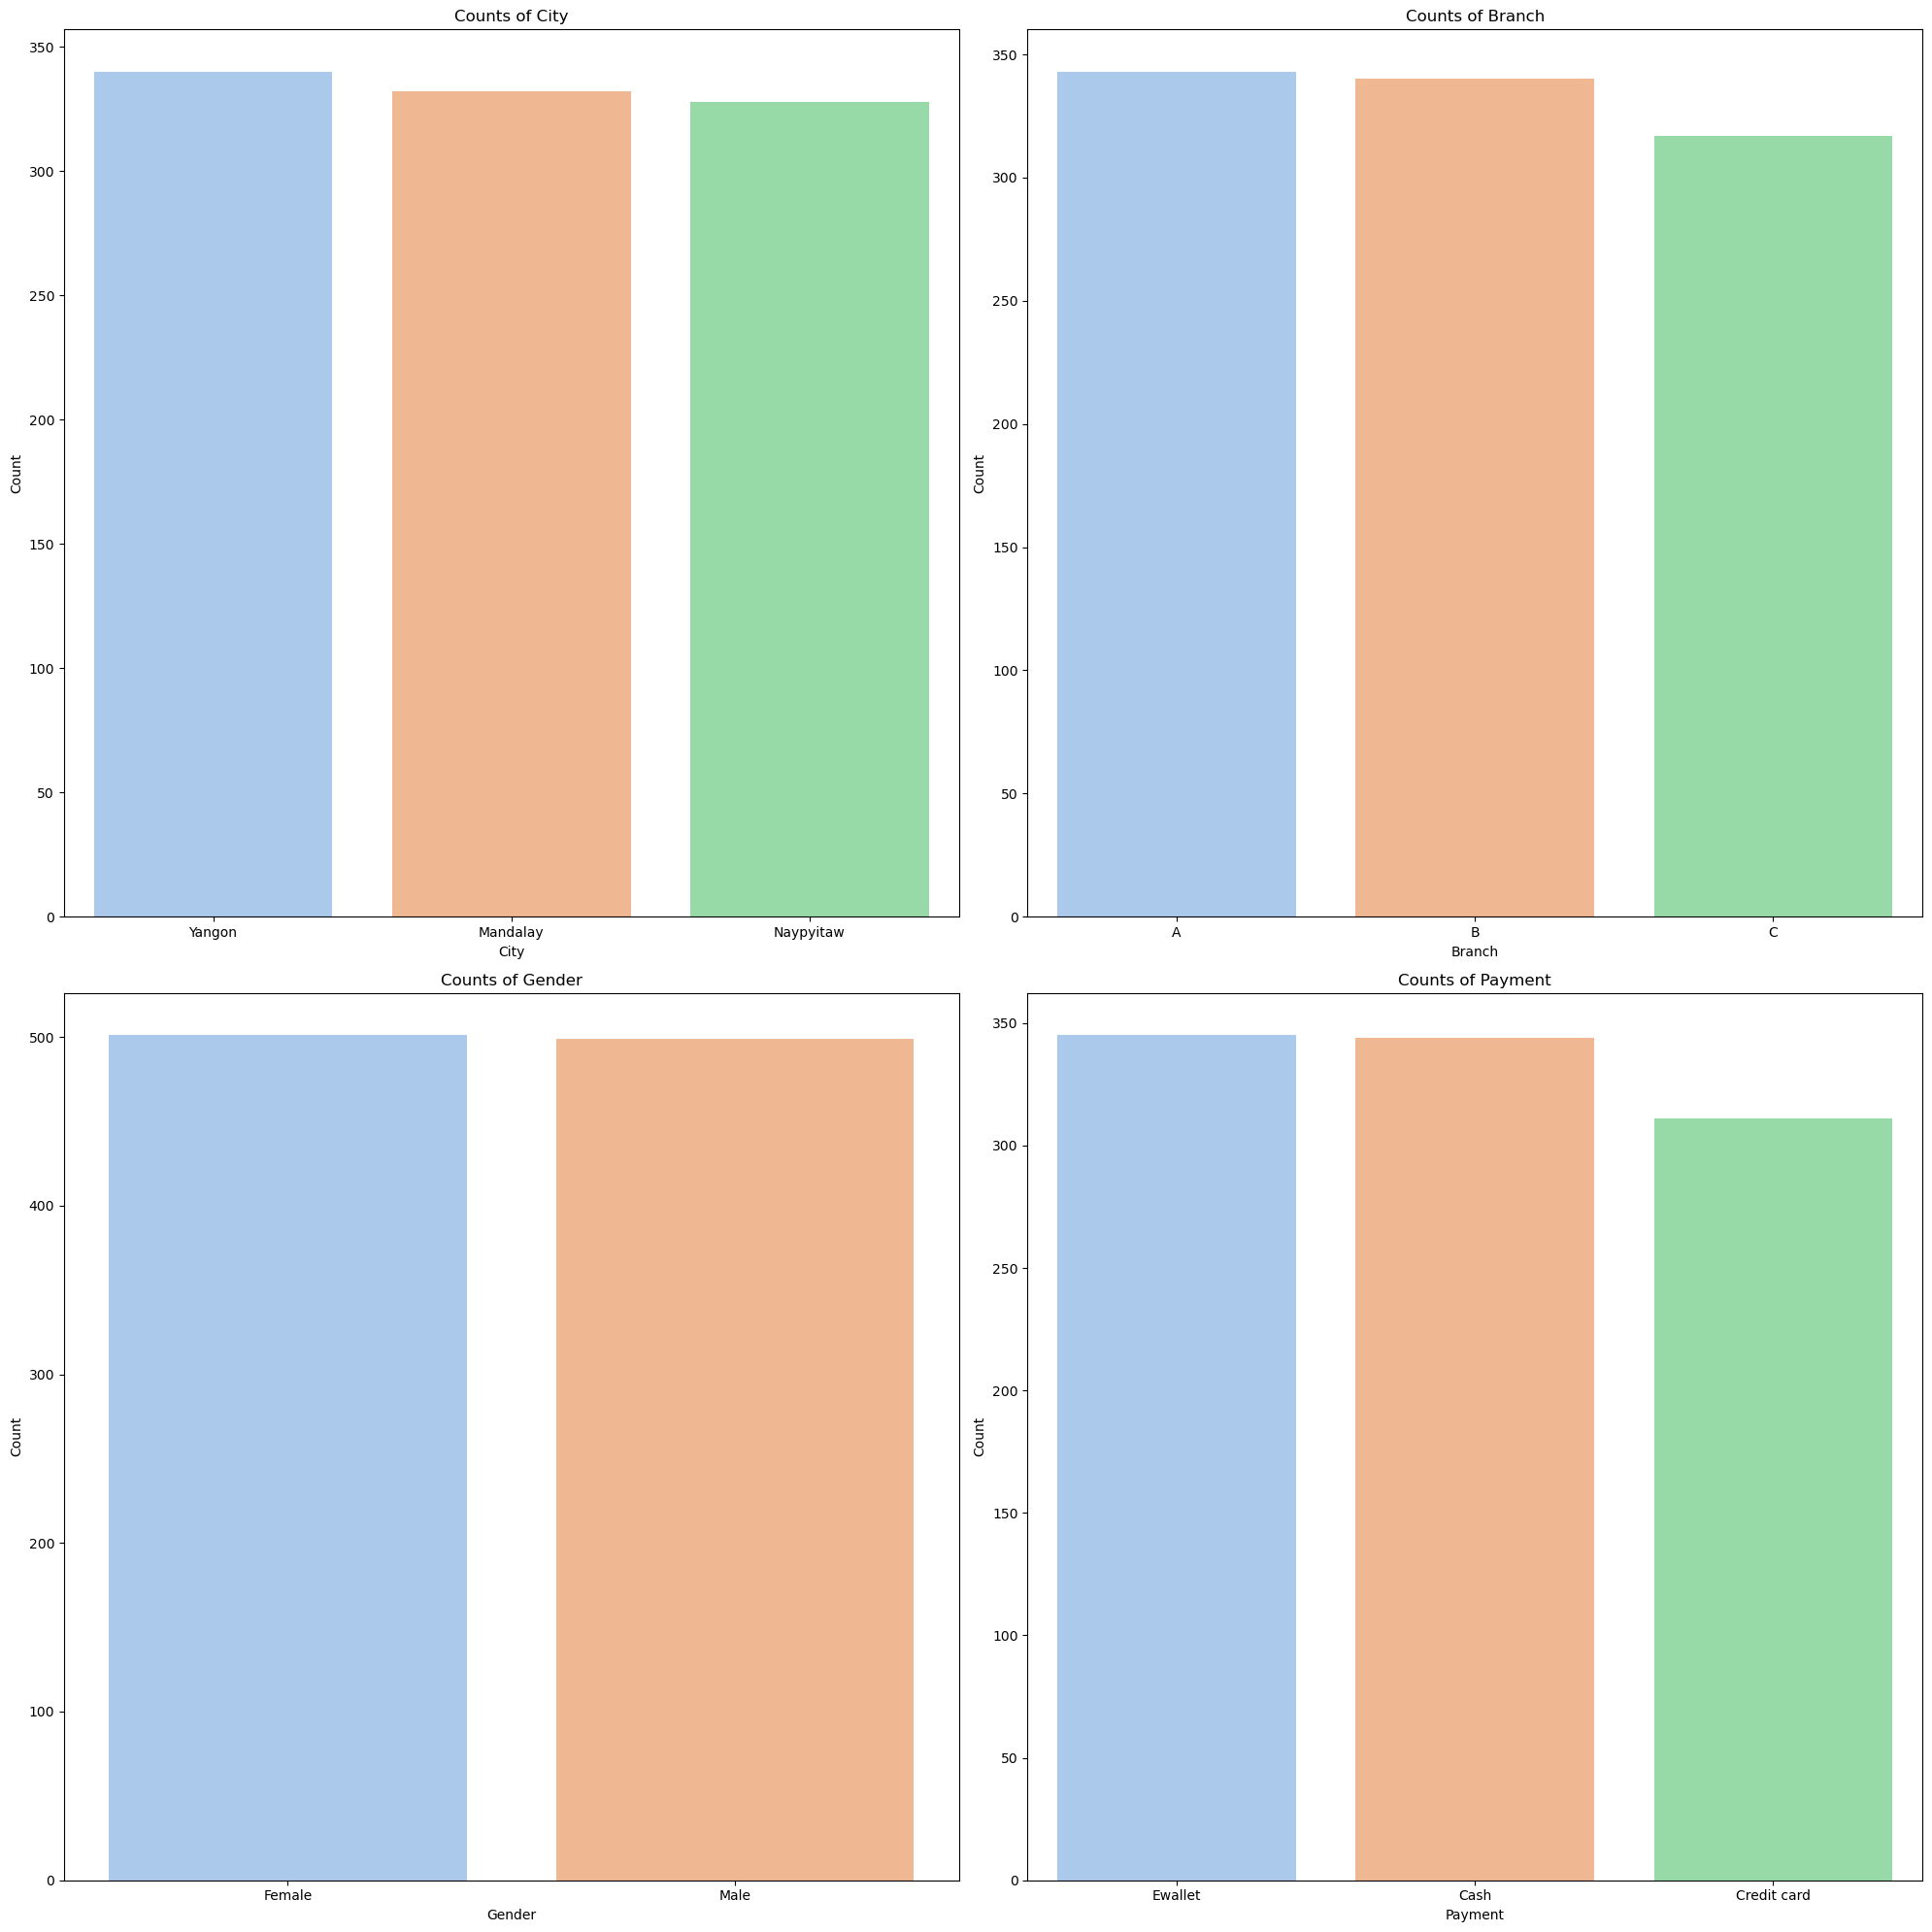

In [6]:
def plot_counts(data, columns):
    plt.figure(figsize=(20, 20))
    for i, col in enumerate(columns, 1):
        col_counts = data[col].value_counts().reset_index()
        col_counts.columns = [col, 'Count']
        plt.subplot(2, 2, i)
        sns.barplot(x=col, y='Count', data=col_counts, palette='pastel')
        plt.title(f'Counts of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

# Columns to plot
columns_to_plot = ['City', 'Branch', 'Gender', 'Payment']

# Plot the counts for each column
plot_counts(data, columns_to_plot)

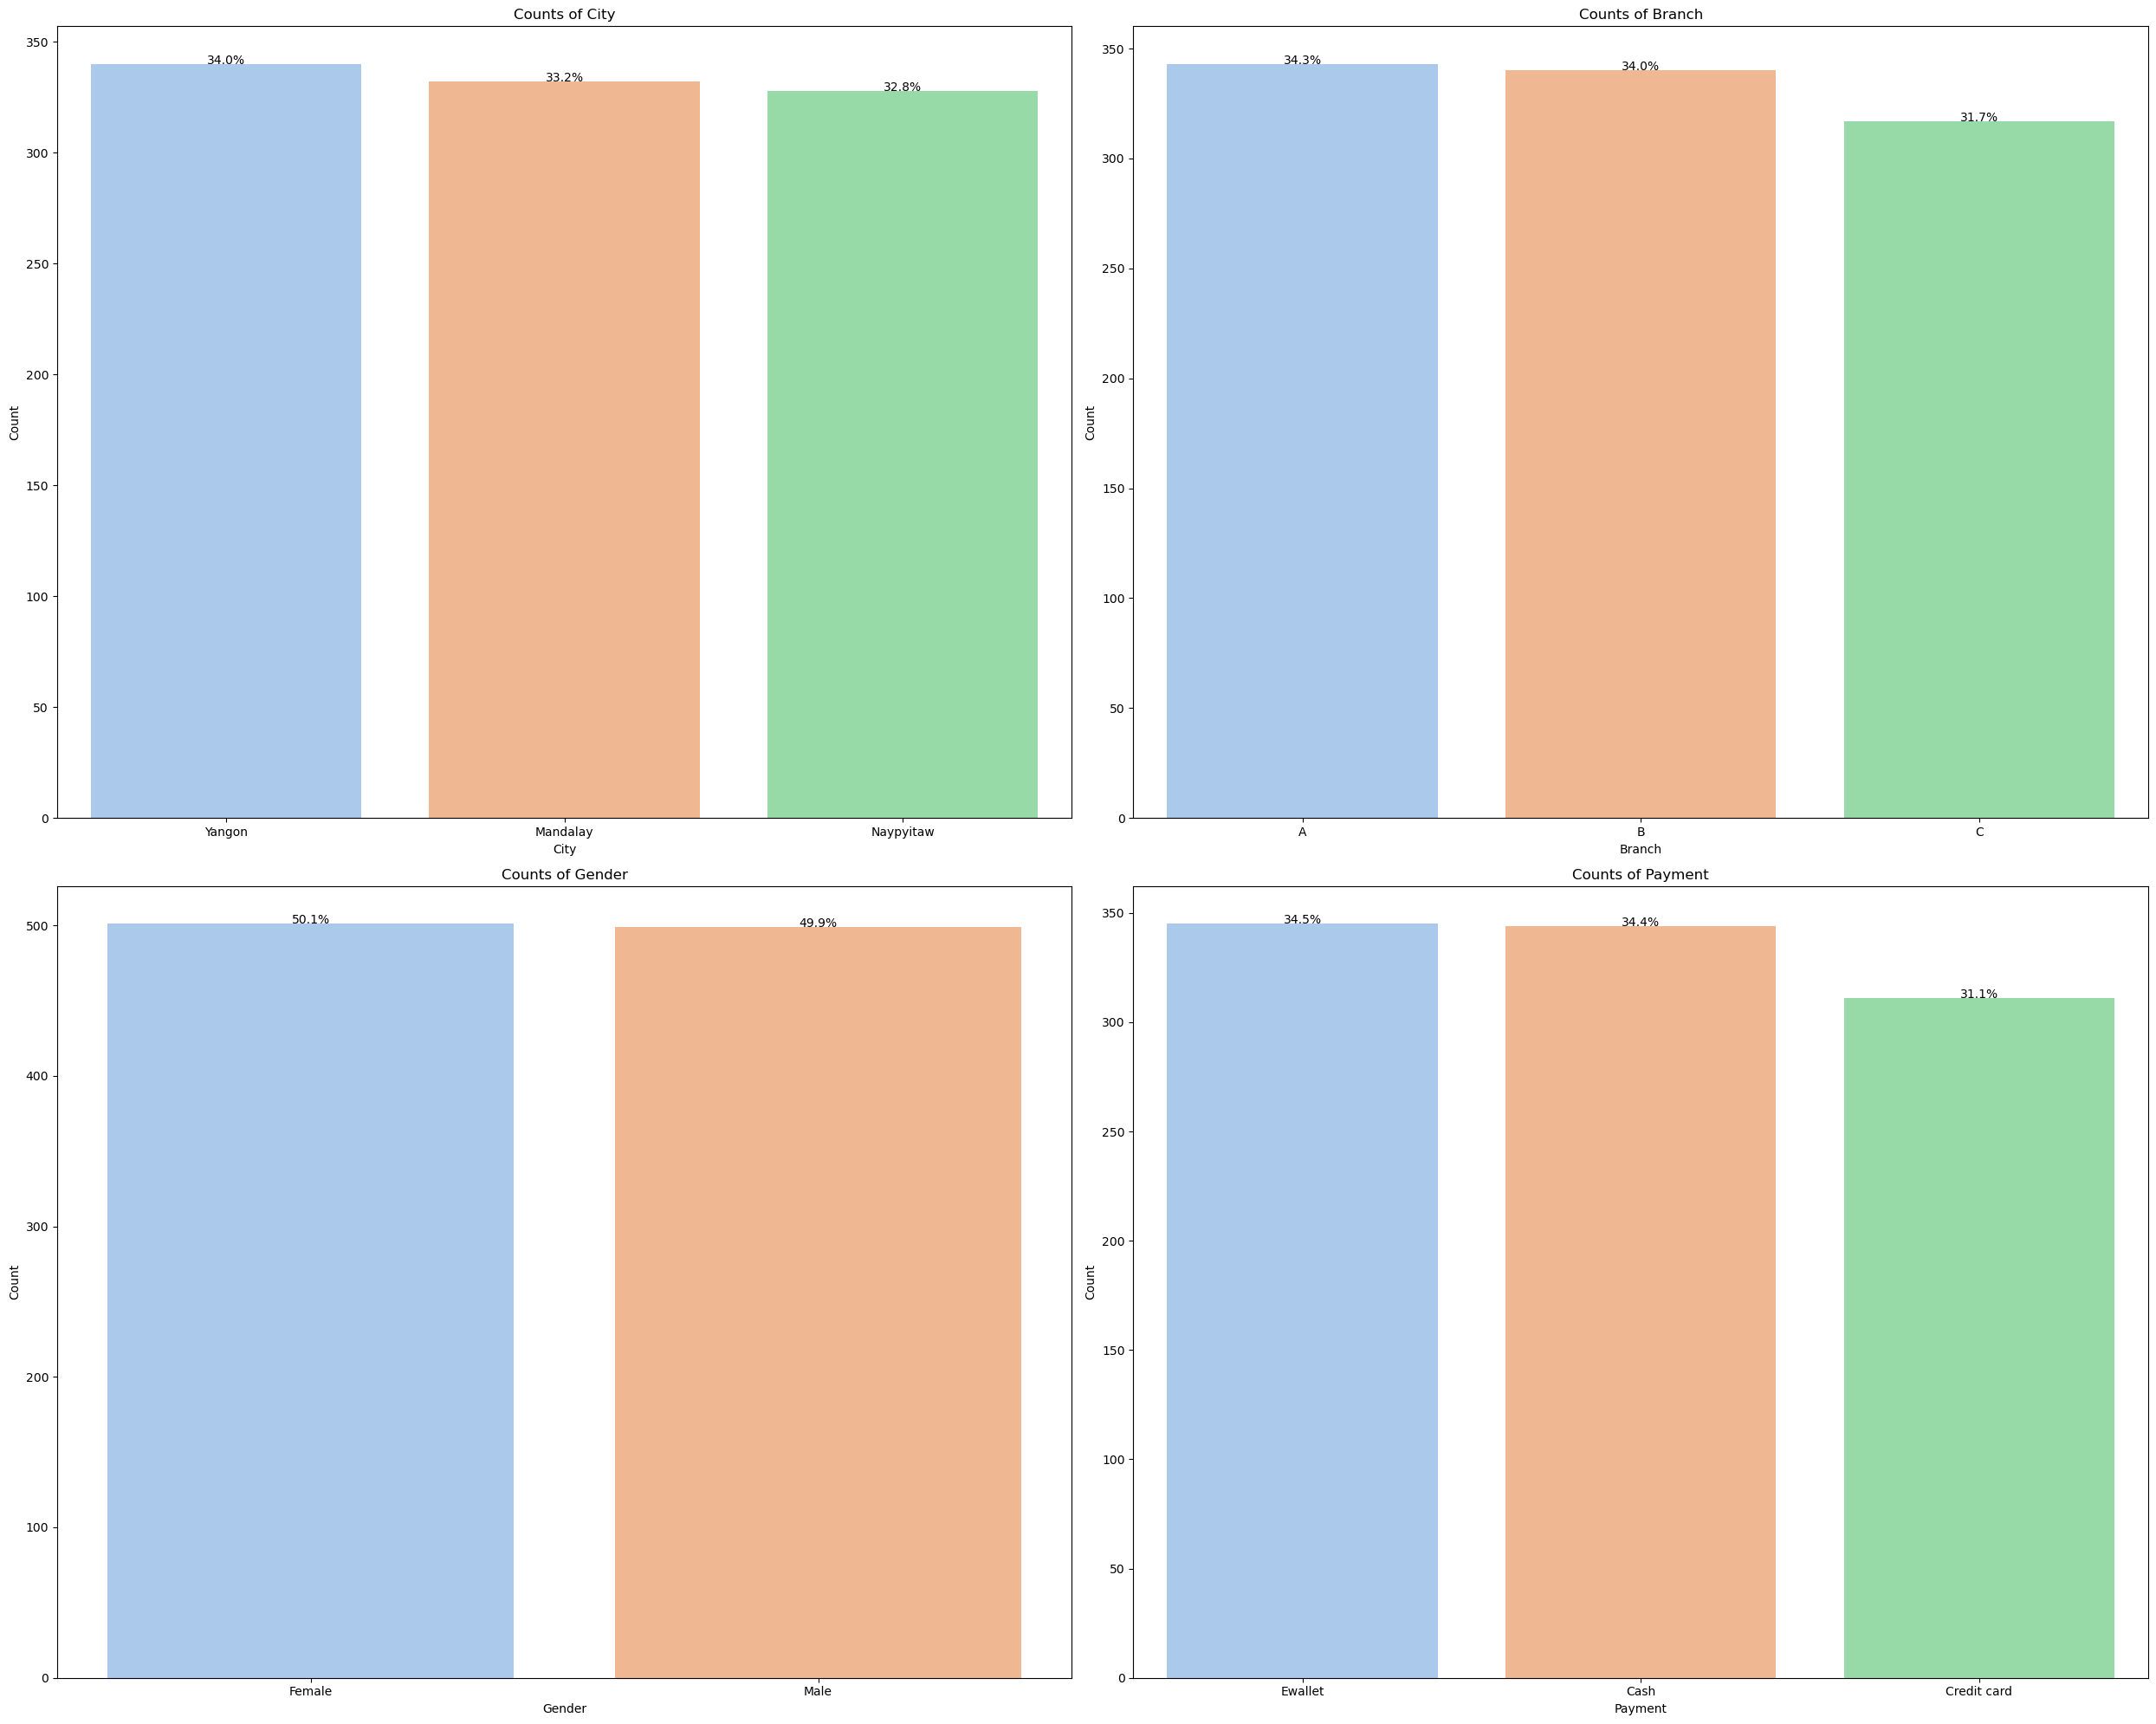

In [7]:
# function to plot counts with percentages

def plot_counts_with_percentages(data, columns):
    plt.figure(figsize=(25, 20))
    total_rows = len(data)
    
    for i, col in enumerate(columns, 1):
        col_counts = data[col].value_counts().reset_index()
        col_counts.columns = [col, 'Count']
        col_counts['Percentage'] = (col_counts['Count'] / total_rows) * 100
        
        plt.subplot(2, 2, i)
        sns.barplot(x=col, y='Count', data=col_counts, palette='pastel')
        
        # Annotate each bar with the percentage
        for index, row in col_counts.iterrows():
            plt.text(index, row['Count'], f"{row['Percentage']:.1f}%", color='black', ha="center")
        
        plt.title(f'Counts of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
    
    plt.tight_layout()
    plt.show()

# Columns to plot
columns_to_plot = ['City', 'Branch', 'Gender', 'Payment']

# Plot the counts and percentages for each column
plot_counts_with_percentages(data, columns_to_plot)

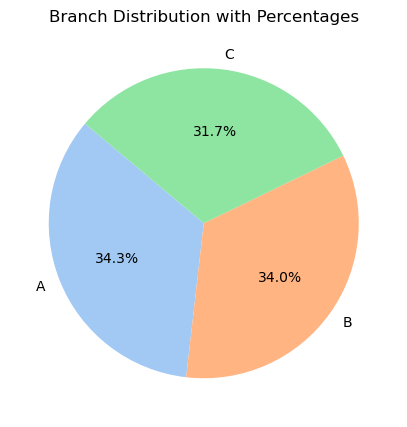

In [8]:
# counts and percentages for the 'Branch' column

branch_counts = data['Branch'].value_counts()
branch_percentages = (branch_counts / branch_counts.sum()) * 100

# Create a pie chart
plt.figure(figsize=(5, 8))
plt.pie(branch_counts, labels=branch_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))

# Add a title
plt.title('Branch Distribution with Percentages')

# Show the plot
plt.show()

In [9]:
data['Total_Sales'] = data['Unit price']*data['Quantity']

data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data['Date'].head()

0   2019-01-05
1   2019-03-08
2   2019-03-03
3   2019-01-27
4   2019-02-08
Name: Date, dtype: datetime64[ns]

In [10]:
# Extract month and year 
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year

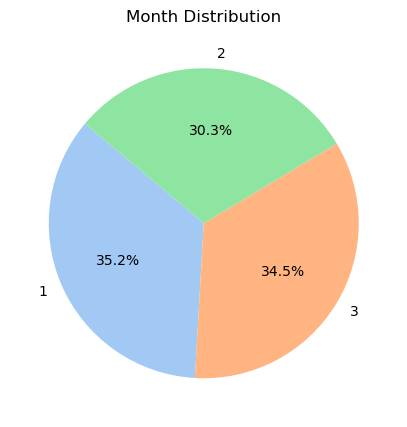

In [11]:
# counts and percentages for the 'Month' column

branch_counts = data['Month'].value_counts()
branch_percentages = (branch_counts / branch_counts.sum()) * 100

# Create a pie chart
plt.figure(figsize=(5, 8))
plt.pie(branch_counts, labels=branch_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))

# Add a title
plt.title('Month Distribution')

# Show the plot
plt.show()

# Analyze the performance of sales and revenue at the city and branch level

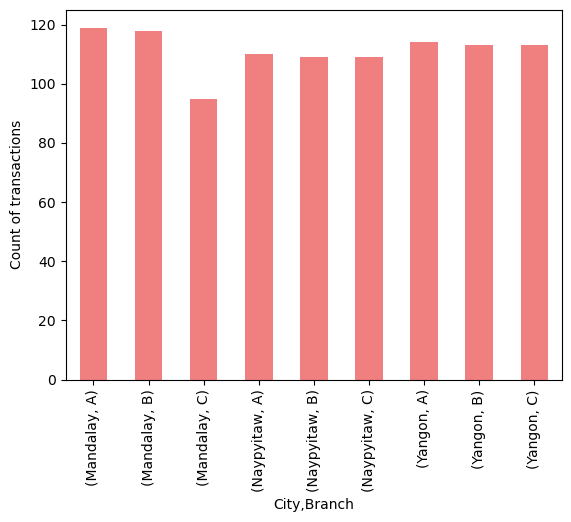

In [12]:
# count of transactions by branch and city

count = data.groupby(['City', 'Branch']).size().plot(kind='bar', color = 'lightcoral')
count.set_ylabel("Count of transactions")

plt.show()

In [13]:
# performance(total sales, average sale, no of sales, and total quantity) by branch and city

performance_bybranch = data.groupby(['City', 'Branch']).agg({
    'Total_Sales': ['sum', 'mean', 'count'],
    'Quantity': 'sum'
}).reset_index()

performance_bybranch.columns = ['City', 'Sales', 'Total Sales', 'Average Sales', 'Number of Sales', 'Total quantity']
performance_bybranch

,City,Sales,Total Sales,Average Sales,Number of Sales,Total quantity
0,Mandalay,A,34130.09,286.807479,119,637
1,Mandalay,B,37215.93,315.389237,118,664
2,Mandalay,C,29794.62,313.627579,95,519
3,Naypyitaw,A,35985.64,327.142182,110,648
4,Naypyitaw,B,35157.75,322.548165,109,604
5,Naypyitaw,C,34160.14,313.395780,109,579
6,Yangon,A,33647.27,295.151491,114,598
7,Yangon,B,35193.51,311.446991,113,631
8,Yangon,C,32302.43,285.862212,113,630


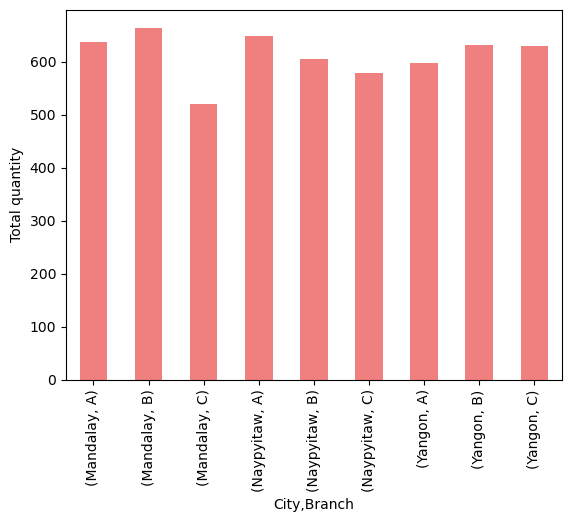

In [14]:
# plot the total quantity by branch and city

quantity_bybranch = data.groupby(['City', 'Branch'])['Quantity'].sum().plot(kind='bar', color = 'lightcoral')
quantity_bybranch.set_ylabel("Total quantity")

plt.show()

# average price of an item sold at each branch of the city 

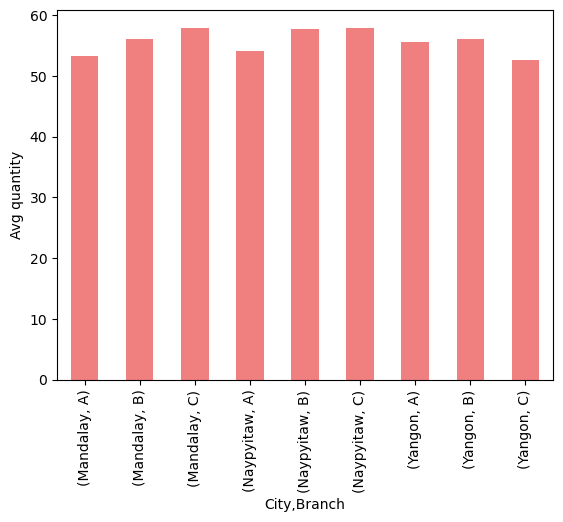

In [15]:
# plot the average price by branch and city

avg_price = data.groupby(['City', 'Branch'])['Unit price'].mean().plot(kind='bar', color = 'lightcoral')
avg_price.set_ylabel("Avg quantity")

plt.show()

In [16]:
# average price by branch and city

performance = data.groupby(['City', 'Branch'])['Unit price'].mean().reset_index()

performance.columns = ['City', 'Sales', 'Average price']
performance

,City,Sales,Average price
0,Mandalay,A,53.353866
1,Mandalay,B,56.133305
2,Mandalay,C,57.958316
3,Naypyitaw,A,54.123182
4,Naypyitaw,B,57.785688
5,Naypyitaw,C,57.941009
6,Yangon,A,55.639298
7,Yangon,B,56.011062
8,Yangon,C,52.684602


# Analyze the performance of sales and revenue, Month over Month across the Product line, Gender, and Payment Method, and identify the focus areas to get better sales for April 2019.

In [17]:
# performance by month and year

performance_by_month = data.groupby(['Year', 'Month']).agg({
    'Total_Sales': ['sum', 'mean', 'count'],
    'Quantity': 'sum'
}).reset_index()

performance_by_month.columns = ['Year', 'Month', 'Total Sales', 'Average Sales', 'Number of Sales', 'Total quantity']
performance_by_month

,Year,Month,Total Sales,Average Sales,Number of Sales,Total quantity
0,2019,1,110754.16,314.642500,352,1965
1,2019,2,92589.88,305.577162,303,1654
2,2019,3,104243.34,302.154609,345,1891


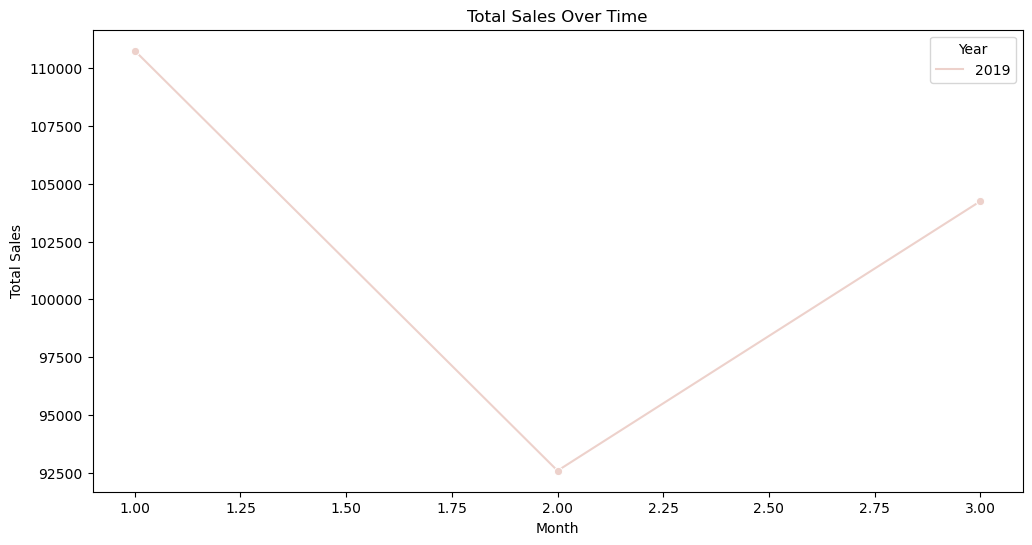

In [18]:
# plot total sales over time

plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Total Sales', hue='Year', data=performance_by_month, marker='o')
plt.title('Total Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

In [19]:
# performance by gender, month and year

performance_by_gender = data.groupby(['Year', 'Month', 'Gender']).agg({
    'Total_Sales': ['sum', 'mean', 'count'],
    'Quantity': 'sum',
    'Payment' : 'count'
}).reset_index()

performance_by_gender.columns = ['Year', 'Month', 'Gender','Total Sales', 'Average Sales', 'Number of Sales', 'Total quantity', 'Count of transactions']
performance_by_gender

,Year,Month,Gender,Total Sales,Average Sales,Number of Sales,Total quantity,Count of transactions
0,2019,1,Female,56322.84,320.016136,176,1019,176
1,2019,1,Male,54431.32,309.268864,176,946,176
2,2019,2,Female,53652.91,327.151890,164,951,164
3,2019,2,Male,38936.97,280.122086,139,703,139
4,2019,3,Female,49912.75,310.017081,161,899,161
5,2019,3,Male,54330.59,295.274946,184,992,184


In [20]:
# performance by product line, month and year

performance_by_productline = data.groupby(['Year', 'Month', 'Product line']).agg({
    'Total_Sales': ['sum', 'mean', 'count'],
    'Quantity': 'sum',
    'Payment' : 'count'
}).reset_index()

performance_by_productline.columns = ['Year', 'Month', 'Product line','Total Sales', 'Average Sales', 'Number of Sales', 'Total quantity', 'Count of transactions']
performance_by_productline

,Year,Month,Product line,Total Sales,Average Sales,Number of Sales,Total quantity,Count of transactions
0,2019,1,Electronic accessories,17934.56,332.121481,54,333,54
1,2019,1,Fashion accessories,18423.92,287.873750,64,336,64
2,2019,1,Food and beverages,18638.60,332.832143,56,325,56
3,2019,1,Health and beauty,15603.02,318.428980,49,254,49
4,2019,1,Home and lifestyle,19518.80,330.827119,59,342,59
5,2019,1,Sports and travel,20635.26,294.789429,70,375,70
6,2019,2,Electronic accessories,16536.10,306.224074,54,313,54
7,2019,2,Fashion accessories,18104.63,301.743833,60,295,60
8,2019,2,Food and beverages,19047.96,307.225161,62,349,62
9,2019,2,Health and beauty,13906.91,302.324130,46,266,46


In [21]:
# performance by payment method, month and year

performance_by_payment = data.groupby(['Year', 'Month', 'Payment']).agg({
    'Total_Sales': ['sum', 'mean', 'count'],
    'Quantity': 'sum',
    'Payment' : 'count'
}).reset_index()

performance_by_payment.columns = ['Year', 'Month', 'Payment','Total Sales', 'Average Sales', 'Number of Sales', 'Total quantity', 'Count of transactions']
performance_by_payment

,Year,Month,Payment,Total Sales,Average Sales,Number of Sales,Total quantity,Count of transactions
0,2019,1,Cash,39781.03,326.074016,122,708,122
1,2019,1,Credit card,36425.31,322.347876,113,622,113
2,2019,1,Ewallet,34547.82,295.280513,117,635,117
3,2019,2,Cash,34044.13,303.965446,112,596,112
4,2019,2,Credit card,29866.69,331.852111,90,505,90
5,2019,2,Ewallet,28679.06,283.951089,101,553,101
6,2019,3,Cash,33038.24,300.347636,110,592,110
7,2019,3,Credit card,29676.64,274.783704,108,595,108
8,2019,3,Ewallet,41528.46,326.995748,127,704,127


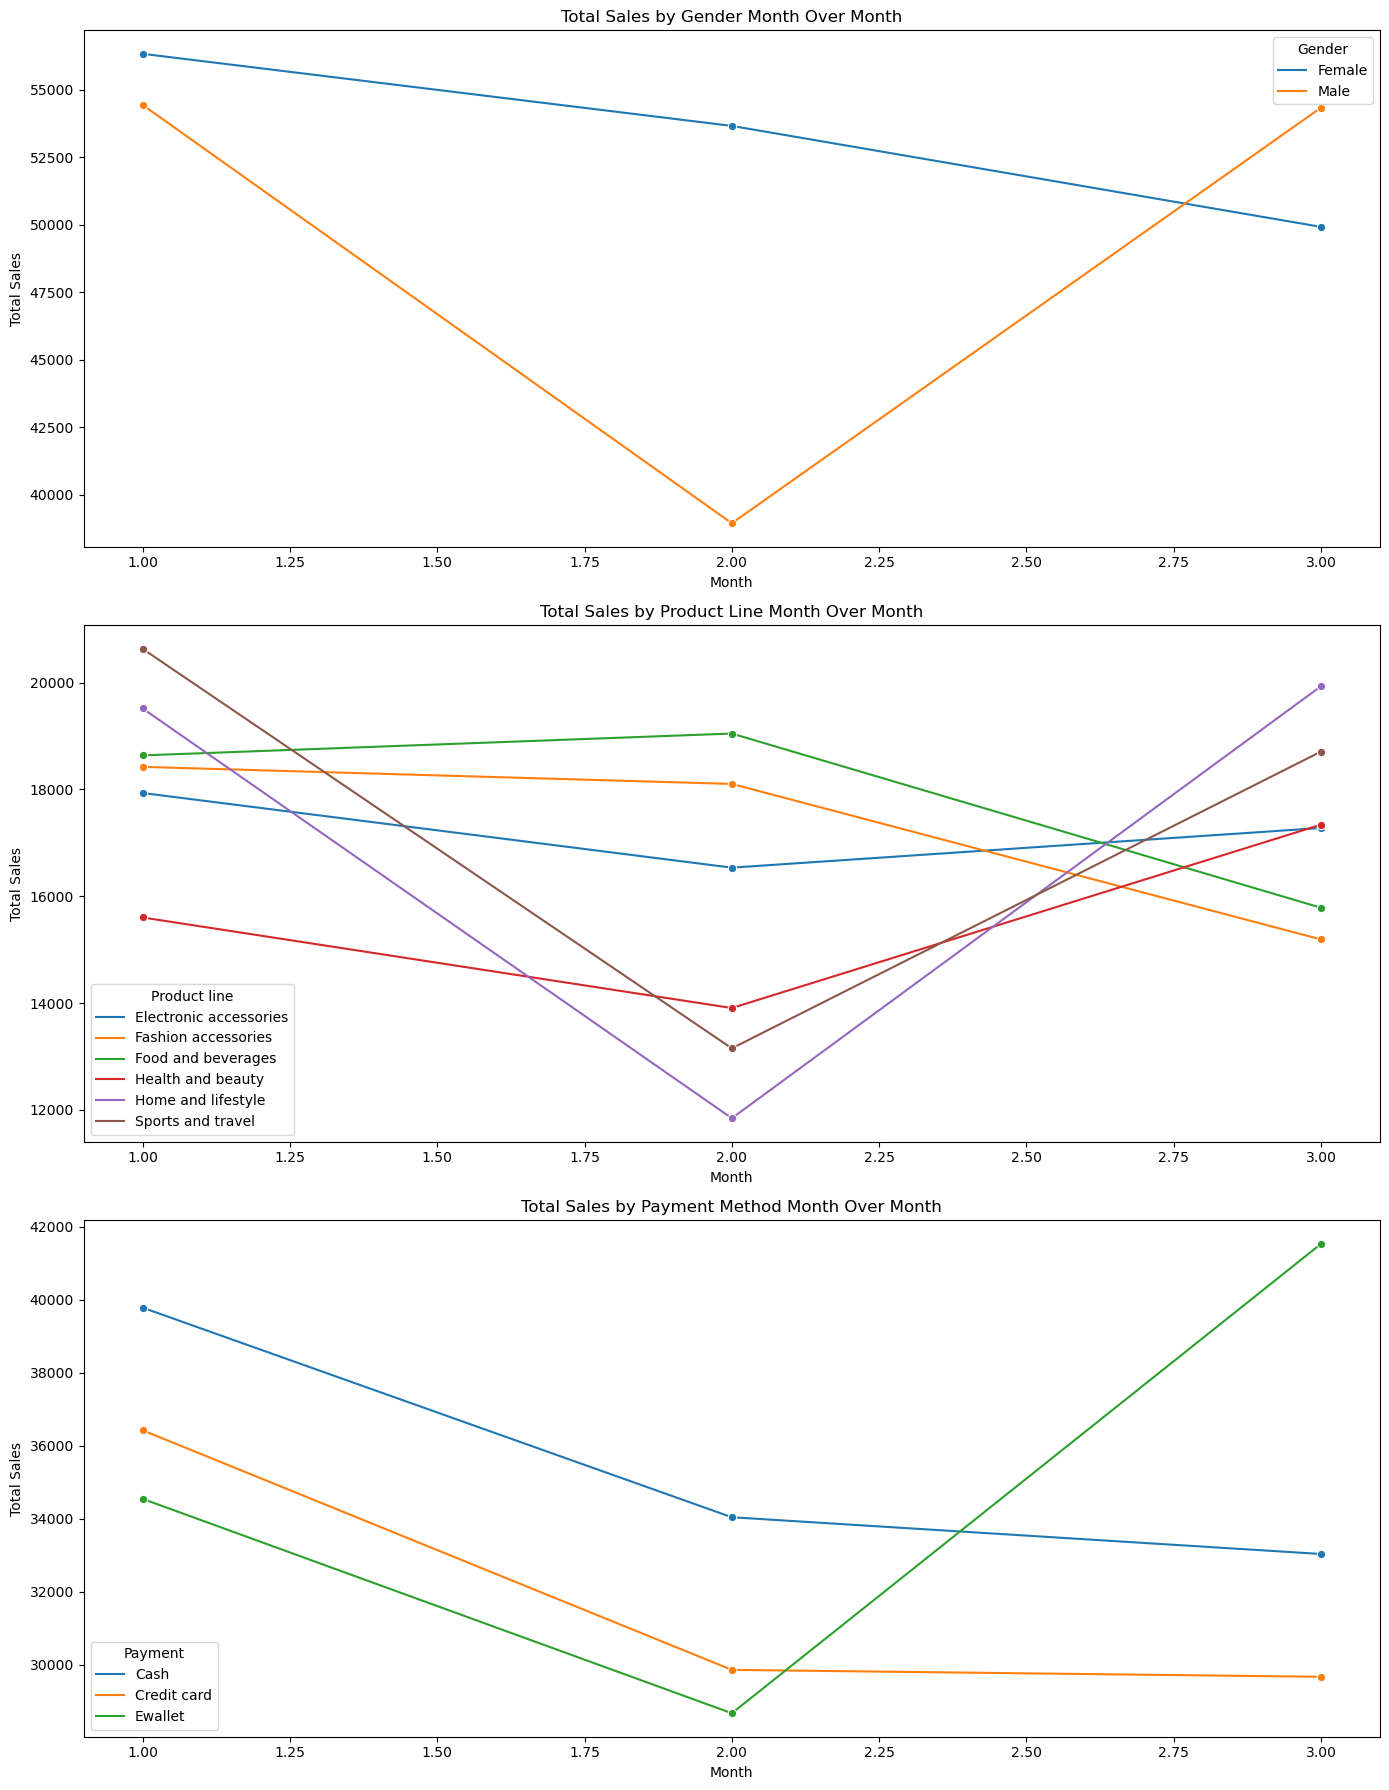

In [22]:
# plot the performance by gender, product Line, and payment method to identify trends
fig, axes = plt.subplots(3, 1, figsize=(14, 18))

# total sales over months, seperated by gender
sns.lineplot(data=performance_by_gender, x='Month', y='Total Sales', hue='Gender', marker='o', ax=axes[0])
axes[0].set_title('Total Sales by Gender Month Over Month')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Total Sales')

# total sales trend across different product lines over months
sns.lineplot(data=performance_by_productline, x='Month', y='Total Sales', hue='Product line', marker='o', ax=axes[1])
axes[1].set_title('Total Sales by Product Line Month Over Month')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Total Sales')

# trend of total sales over the months, seperated by ppayment method
sns.lineplot(data=performance_by_payment, x='Month', y='Total Sales', hue='Payment', marker='o', ax=axes[2])
axes[2].set_title('Total Sales by Payment Method Month Over Month')
axes[2].set_xlabel('Month')
axes[2].set_ylabel('Total Sales')

plt.tight_layout()
plt.show()